In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [29]:
organism = "ecoli"

In [240]:
tfp_df = pd.read_csv('data/'+organism+'/'+organism+'_true_interactions_from_false_positives.txt', sep=",", header=None)

In [241]:
tfp_df = tfp_df.drop_duplicates()

In [204]:
tfp_df.iloc[:,2] = round(tfp_df.iloc[:,2] , 3)

/Users/kishan_kc/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [284]:
tfp_df.iloc[:,0] = tfp_df.iloc[:,0].str.strip()

In [170]:
fp_df_1 = pd.read_csv('data/'+organism+'/'+organism+'_prediction_false_positives.txt', sep=",", header=0)

In [285]:
tfp_df.iloc[:,1] = tfp_df.iloc[:,1].str.strip()

In [242]:
fp_df = pd.read_csv('data/'+organism+'/'+organism+'_prediction_false_positives.csv', sep=",", header=0)

In [286]:
fp_df = fp_df.drop_duplicates()

In [294]:
fp_df['Input'] = fp_df['Input'].str.strip()
fp_df['Input.1']= fp_df['Input.1'].str.strip()

,#,Input,Gene Name,Description,Input.1,Gene Name.1,Description.1,prob
22,13,YGR092W,DBF2,Ser/Thr kinase involved in transcription and s...,YLR200W,YKE2,Subunit of the heterohexameric Gim/prefoldin p...,0.981647
1459,1456,YGR092W,DBF2,Ser/Thr kinase involved in transcription and s...,YJR010C-A,SPC1,Subunit of the signal peptidase complex (SPC);...,0.662097
2089,2088,YGR092W,DBF2,Ser/Thr kinase involved in transcription and s...,YPL056C,LCL1,Putative protein of unknown function; deletion...,0.563679


,#,Input,Gene Name,Description,Input.1,Gene Name.1,Description.1,prob
370,364,YHR134W,WSS1,SUMO-ligase and SUMO-targeted metalloprotease;...,YGR092W,DBF2,Ser/Thr kinase involved in transcription and s...,0.884028
2481,2481,YHR171W,ATG7,Autophagy-related protein and dual specificity...,YGR092W,DBF2,Ser/Thr kinase involved in transcription and s...,0.513150


In [336]:
merged_1 = pd.merge(fp_df, tfp_df, right_on=[0,1], left_on=["Input", "Input.1"], how="left")
merged_2 = pd.merge(fp_df, tfp_df, right_on=[0,1],left_on=["Input.1", "Input"])

In [206]:
fp_df['prob']= round(fp_df['prob'] , 3)

In [352]:
merged = pd.concat([merged_1, merged_2])
merged=merged.drop_duplicates(keep="first")

In [389]:
df = merged

In [390]:
true_pos = ~df.iloc[:,8].isnull()

In [391]:
df ['true'] = true_pos * 1

In [392]:
df = df.iloc[:,[0,1,2,3,4,5,6,7,11]]

In [400]:
df = df.sort_values(by="prob", ascending=False)

128

In [404]:
df.to_csv("./data/"+organism+"/"+organism+"_true_interactions_with_false_positives.csv", header=True, index=None, sep=",")

In [30]:
df = pd.read_csv("./data/"+organism+"/"+organism+"_true_interactions_with_false_positives.csv", header=0, sep=",")

In [34]:
df_bar = df.loc[:,['prob', 'true']]

In [35]:
import math

In [36]:
df_bar['prob_round'] = df['prob'].apply(lambda x: math.floor(x*10)/10)

In [38]:
df_bar = df_bar.groupby(['prob_round','true']).size().unstack(fill_value=0)

In [39]:
df_bar

true,0,1
prob_round,,
0.5,145,3
0.6,123,2
0.7,112,6
0.8,106,13
0.9,307,54


In [40]:
df_bar['percent'] = df_bar[1]/df_bar[0]

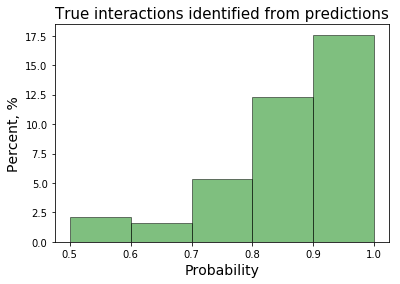

In [41]:
# Values of each group
bars1 = df_bar['percent'] * 100
 
# Heights of bars1 + bars2 (TO DO better)
bars = [1, 1, 1, 1, 1]
 
# The position of the bars on the x-axis
r = [1,2,3,4,5]
ticks = [0.5,1.5,2.5,3.5,4.5,5.5]
# Names of group and bar width
names = df_bar.index
barWidth = 1
 
# Create plots with pre-defined labels.
# Alternatively, you can pass labels explicitly when calling `legend`.
# plt.figure(figsize=(12, 5))
fig, ax = plt.subplots()
# Create brown bars
ax.bar(r, bars1, color='green', edgecolor='black', width=barWidth, alpha=0.5, label='True Interactions identified')

tick_names = [0.5,0.6,0.7,0.8,0.9,1.0]
# Custom X axis
plt.xticks(ticks, tick_names)
plt.xlabel("Probability", fontsize=14)
plt.ylabel("Percent, %", fontsize=14)
plt.title('True interactions identified from predictions', fontsize=15)
plt.savefig(organism+'_false_positives.eps', dpi=1200)
# Show graphic
plt.show()
